
# <p style="text-align: center;">EE 380L: Data Mining</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 70</p>
## <p style="text-align: center;">Due: Thursday, April 5th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

## Name: Yi Zhang
## UT EID: yz23287

## Name: Yaohua Zhao
## UT EID: yz23659

### Note: Q1 and Q3 may take a long time to run (a few hours). It will be more convenient if you run them on a powerful machine. Of course, this is also a good opportunity to use the Azure cloud.

# Question 1:  2 class Classification (30 pts)

In this problem, you will evaluate the performance of 6 classifiers in classifying signal vs background in the MAGIC Gamma Telescope Data Set. The data has been split into training and test as well as standardized for you. 
You will train the following models on this dataset:

1. Gaussian Naive Bayes (http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
2. Linear Discriminant Analysis (http://scikit-learn.org/stable/modules/lda_qda.html)
3. Quadratic Discriminant Analysis
4. Logistic Regression (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html)
5. Linear SVM (http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
6. Radial Basis Function SVM. 

For Logistic Regression, you will have to run kFold cross validation with 5 folds to get the best value of C. C is the inverse of the regularization hyper-parameter.
For SVM (linear and rbf), you will use GridSearchCV (http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) with cv set to 5, to identify the correct value of C. Use `Cs = 10**np.linspace(-2, 2, 10)` as the range of C for SVM gridsearch

Note: Maintain all other parameters at their default settings.

The deliverables for this Problem are the following:
1. Use cross validation to find the best C for logistic regression, linear SVM and rbf SVM. (C means different things for each of the models. Please refer the documentation of each API in sklearn for this) (9 points - 3 points per model)
2. Report the Mean Error Rate = (1 - model_score) for each of these 3 models. (9 points - 3 points per model)
3. Train all 6 models using the best C for logistic regression, linear SVM and rbf SVM. Plot the ROC curve for each of these in one figure. Report the area under the curve (AUC) and accuracy for all 6. (12 points)

Note: SVM by default only learns a decision function. In order to obtain ROC curve, you will need prediction probabilities as well. This will require you to set probability=True when training SVM models.

Note: It is a good idea to measure the time taken to run the fit function for each hyperparameter setting to estimate the time for gridSearchCv on a range of hyperparameters.

In [6]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# load data
# train
train = pd.read_csv('magic_train.csv', header=None)
y_train = train.values[:,10]
y_train[y_train == 'g'] = 0
y_train[y_train == 'h'] = 1
y_train = y_train.astype(float)
X_train = train.values[:,:10]

# test
test = pd.read_csv('magic_test.csv', header=None)
y_test = test.values[:,10]
y_test[y_test == 'g'] = 0
y_test[y_test == 'h'] = 1
y_test = y_test.astype(float)
X_test = test.values[:,:10]

# standardize the data
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [8]:
# logistic regression with cross validation 5
lr_cv = LogisticRegressionCV(cv=5, n_jobs=-1)
lr_cv.fit(X_train, y_train)
y_predict = lr_cv.predict(X_test)
# find the Cs and best C
print("best C for logistic regression model is: " + str(lr_cv.C_))

# Mean Error Rate 1 - model_score
print("mean error rate is: 1 - " + str(lr_cv.score(X_test, y_test)))

best C for logistic regression model is: [0.35938137]
mean error rate is: 1 - 0.7960572226099093


In [9]:
# Linear SVM
Cs = 10**np.linspace(-2, 2, 10)
parameters = {'C':Cs}
lsvm = SVC(kernel='linear', probability=True)
clf = GridSearchCV(lsvm, parameters, cv=5, n_jobs=-1)
clf.fit(X_train, y_train)
print("best C for linear support vectore machine is: " + str(clf.best_params_))

# Mean Error Rate 1 - model_score
print("mean error rate is: 1 - " + str(clf.score(X_test, y_test)))

best C for linear support vectore machine is: {'C': 0.027825594022071243}
mean error rate is: 1 - 0.7978018143754362


In [13]:
# RBF SVM
Cs = 10**np.linspace(-2, 2, 10)
parameters = {'C':Cs}
rbfsvm = SVC(kernel='rbf', probability=True)
clf = GridSearchCV(rbfsvm, parameters, cv=5, n_jobs=-1)
clf.fit(X_train, y_train)
print("best C for RBF support vectore machine is: " + str(clf.best_params_))

# Mean Error Rate 1 - model_score
print("mean error rate is: 1 - " + str(clf.score(X_test, y_test)))

best C for RBF support vectore machine is: {'C': 100.0}
mean error rate is: 1 - 0.8707257501744592


## Question 1 (1) Responses:
1. best C for logistic regression model is: [ 0.35938137], the best C is the average of the C's that correspond to the best scores for each fold.
2. best C for linear support vectore machine is: {'C': 0.027825594022071243}, here, C is the penalty parameter C of the error term.
3. best C for RBF support vectore machine is: {'C': 100.0}, here, C is the penalty parameter C of the error term.

## Question 1 (2) Responses:
mean error rate for logistic regression is: 1 - 0.7960572226099093 = 0.2039427773900907     
mean error rate for linear support vector machine is: 1 - 0.7978018143754362 = 0.20219818562456382   
mean error rate for RBF support vector machine is: 1 - 0.8707257501744592 = 0.1292742498255408

GNB AUC: 0.7711995034383418
GNB Accuracy: 0.7316817864619679
LDA AUC: 0.8461535909897093
LDA Accuracy: 0.7885554780181437
QDA AUC: 0.8719141865452542
QDA Accuracy: 0.7864619678995115
LR AUC: 0.8473600988877387
LR Accuracy: 0.7960572226099093
LSVM AUC: 0.8430521372491965
LSVM Accuracy: 0.7955338450802513
RBFSVM AUC: 0.925823581291737
RBFSVM Accuracy: 0.8705512909979065


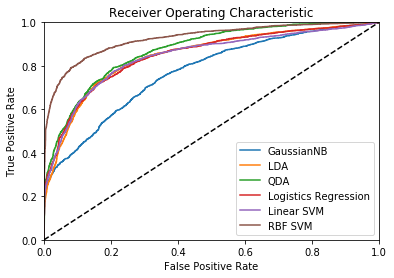

In [14]:
from sklearn.metrics import accuracy_score

# GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predict = gnb.predict_proba(X_test)
preds = y_predict[:,1]
fpr, tpr, thresholds = roc_curve(y_test, preds)
plt.plot(fpr, tpr, label='GaussianNB')
print("GNB AUC: " + str(roc_auc_score(y_test, preds)))  # auc
print("GNB Accuracy: " + str(accuracy_score(y_test, preds.round())))  # accuracy after normalized

# Linear Discriminant Analysis
lda = LDA()
lda.fit(X_train, y_train)
y_predict = lda.predict_proba(X_test)
preds = y_predict[:,1]
fpr, tpr, thresholds = roc_curve(y_test, preds)
plt.plot(fpr, tpr, label='LDA')
print("LDA AUC: " + str(roc_auc_score(y_test, preds)))
print("LDA Accuracy: " + str(accuracy_score(y_test, preds.round())))

# Quadratic Discriminant Analysis
qda = QDA()
qda.fit(X_train, y_train)
y_predict = qda.predict_proba(X_test)
preds = y_predict[:,1]
fpr, tpr, thresholds = roc_curve(y_test, preds)
plt.plot(fpr, tpr, label='QDA')
print("QDA AUC: " + str(roc_auc_score(y_test, preds)))
print("QDA Accuracy: " + str(accuracy_score(y_test, preds.round())))

# ROC curve for Logistics Regression
lr = LogisticRegression(C=0.35938137)
lr.fit(X_train, y_train)
y_predict = lr.predict_proba(X_test)
preds = y_predict[:,1]
fpr, tpr, thresholds = roc_curve(y_test, preds)
plt.plot(fpr, tpr, label='Logistics Regression')
print("LR AUC: " + str(roc_auc_score(y_test, preds)))
print("LR Accuracy: " + str(accuracy_score(y_test, preds.round())))

# Linear SVM
lsvm = SVC(kernel='linear', probability=True, C=0.027825594022071243)
lsvm.fit(X_train, y_train)
y_predict = lsvm.predict_proba(X_test)
preds = y_predict[:,1]
fpr, tpr, thresholds = roc_curve(y_test, preds)
plt.plot(fpr, tpr, label='Linear SVM')
print("LSVM AUC: " + str(roc_auc_score(y_test, preds)))
print("LSVM Accuracy: " + str(accuracy_score(y_test, preds.round())))

# RBF SVM
rbfsvm = SVC(kernel='rbf', probability=True, C=100)
rbfsvm.fit(X_train, y_train)
y_predict = rbfsvm.predict_proba(X_test)
preds = y_predict[:,1]
fpr, tpr, thresholds = roc_curve(y_test, preds)
plt.plot(fpr, tpr, label='RBF SVM')
print("RBFSVM AUC: " + str(roc_auc_score(y_test, preds)))
print("RBFSVM Accuracy: " + str(accuracy_score(y_test, preds.round())))

# configure the plot
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'k--')  # 45 degree
# set the limits
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Question 1 (3) Responses
a. The ROC curve is shown above. 

b. AUC and Accuracy for each model are listed below

| Model | AUC | Accuracy |
|-------|-----|----------|
| GNB | 0.771199503438 | 0.731681786462 |
| LDA | 0.84615359099 | 0.788555478018 |
| QDA | 0.871914186545 | 0.7864619679 |
| LR | 0.847360098888 | 0.79605722261 |
| LSVM | 0.843051540165 | 0.795359385904 |
| RBFSVM | 0.92582749551 | 0.870900209351 |

# Question 2: Bayesian Networks (10 pts)
In the Bayesian Network shown below, the nodes represent the following random variables: S stands for "Smoking", LC for "Lung Cancer", B for "Bronchitis", T for "Tuberculosis", D for "Dyspnea". The necessary conditional probabilities are provided alongside. 

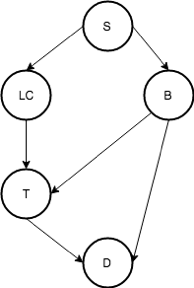

In [1]:
from IPython.display import Image
Image(filename='BayesianNetworks.png')

$$Pr(S = yes) = 0.1$$
$$Pr(LC = yes | S = yes) = 0.03$$
$$Pr(LC = yes | S = no) = 0.01$$
$$Pr(B = yes | S = yes) = 0.06$$
$$Pr(B = yes | S = no) = 0.02$$
$$Pr(T = yes | LC = yes, B = yes) = 0.8$$
$$Pr(T = yes | LC = yes, B = no) = 0.5$$
$$Pr(T = yes | LC = no, B = yes) = 0.1$$
$$Pr(T = yes | LC = no, B = no) = 0.04$$
$$Pr(D = yes | T = yes, B = yes) = 0.9$$
$$Pr(D = yes | T = yes, B = no) = 0.7$$
$$Pr(D = yes | T = no, B = yes) = 0.65$$
$$Pr(D = yes | T = no, B = no) = 0.015$$

Compute the following probabilities:

(a) (2 pts) $Pr(D = yes)$

(b) (2 pts) $Pr(LC = no, B = yes, D = yes)$

(c) (3 pts) Given that a person has Bronchitis (B = yes) and no Lung Cancer (LC = no), the probability he will has symptoms of Dyspnea (D = yes).

(d) (3 pts) Given that a person is a smoker (S = yes), the probability he will get infected with Tuberculosis (T = yes).

# Answer

## Question 2 Responses

(a) Based on the equation $$ Pr(S, LC, B, T, D)=Pr(S)Pr(LC|S)Pr(B|S)Pr(T|LC, B)Pr(D|T, B) $$, we can calcualte that $Pr(D = yes)=0.061313264$ according to the probability table we have. Please see the figure 1 below.

(b) Based on the calculation process in qustion (a) and the probability table, we can find the values of probability in the table (just combination of 4), then, $$ Pr(LC = no, B = yes, D = yes)=0.015957 $$

## The solutions for (c) and (d) can be found in the figure 2 below.

(c) $Pr(D=yes|LC=no, B=yes)=0.675$

(d) $Pr(T=yes|S=yes)=0.057832$

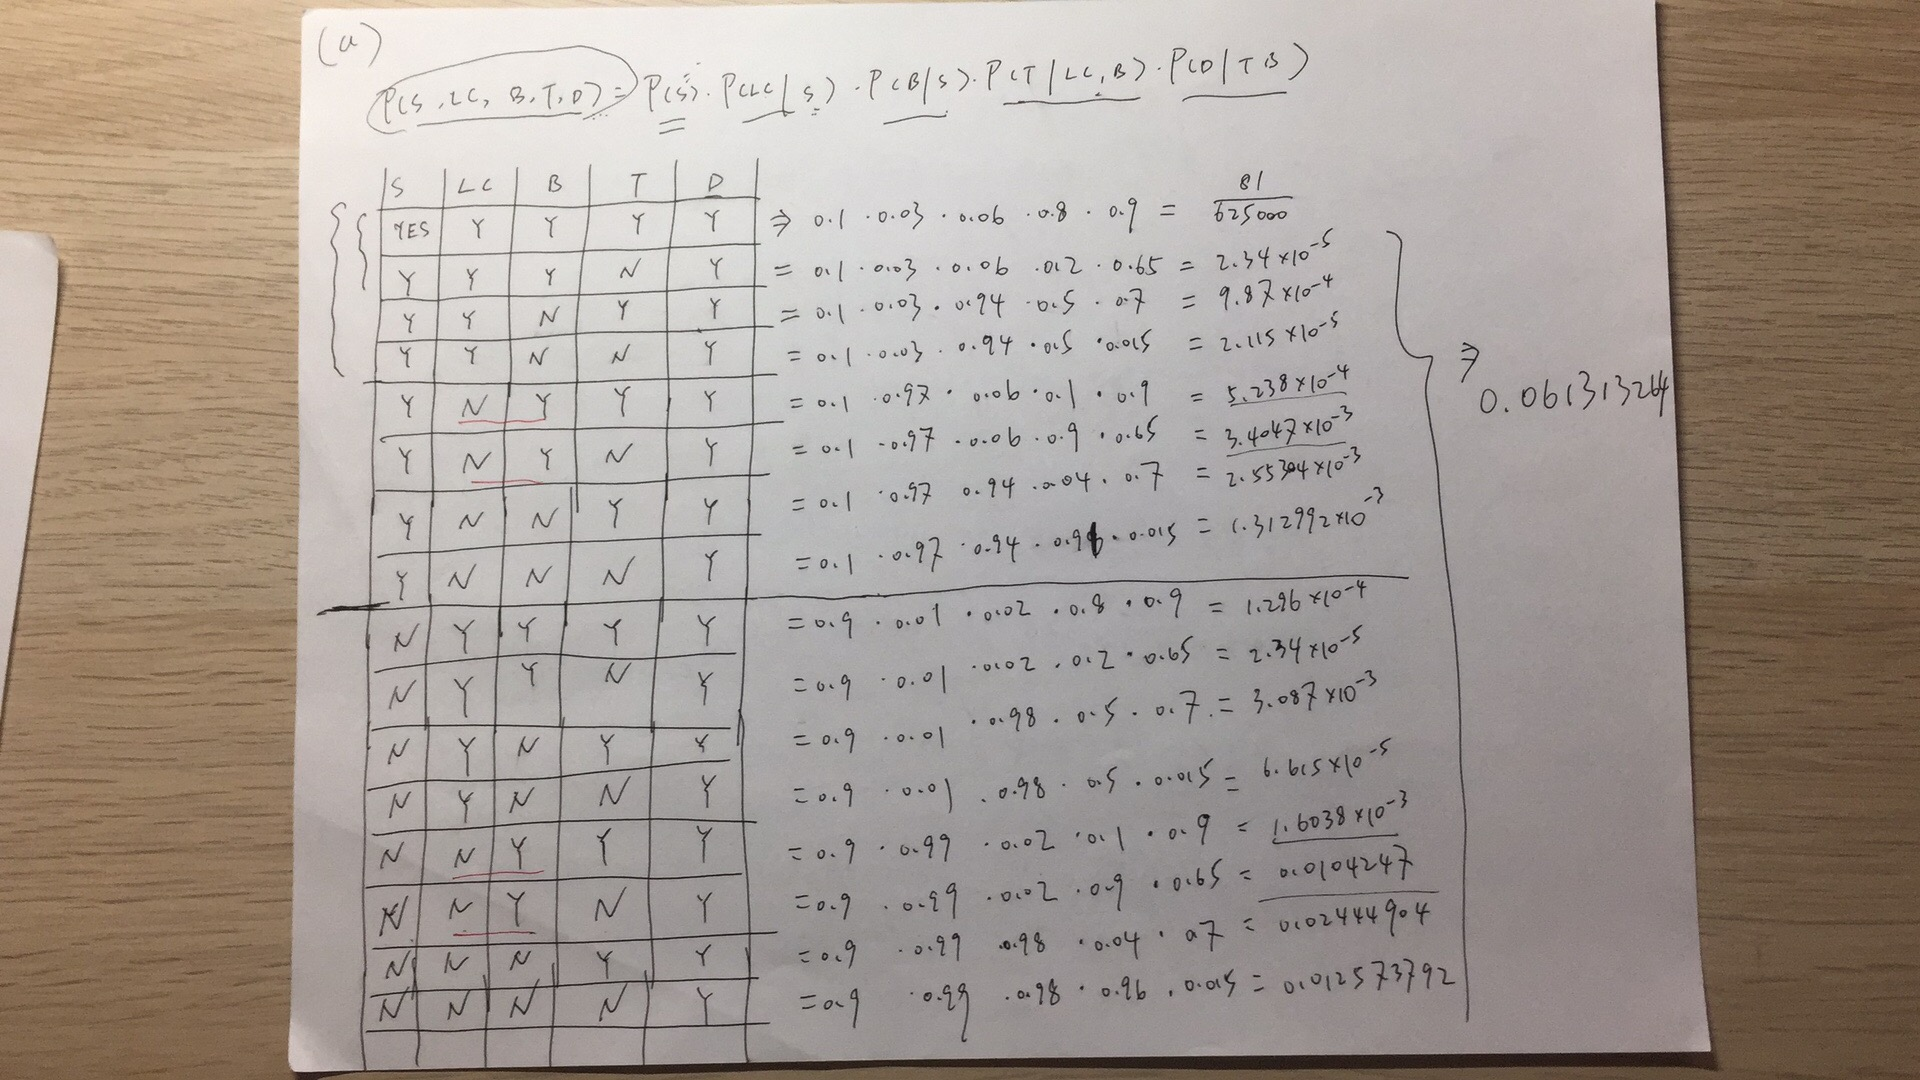

In [5]:
from IPython.display import Image 
Image(filename='img/1.jpeg')

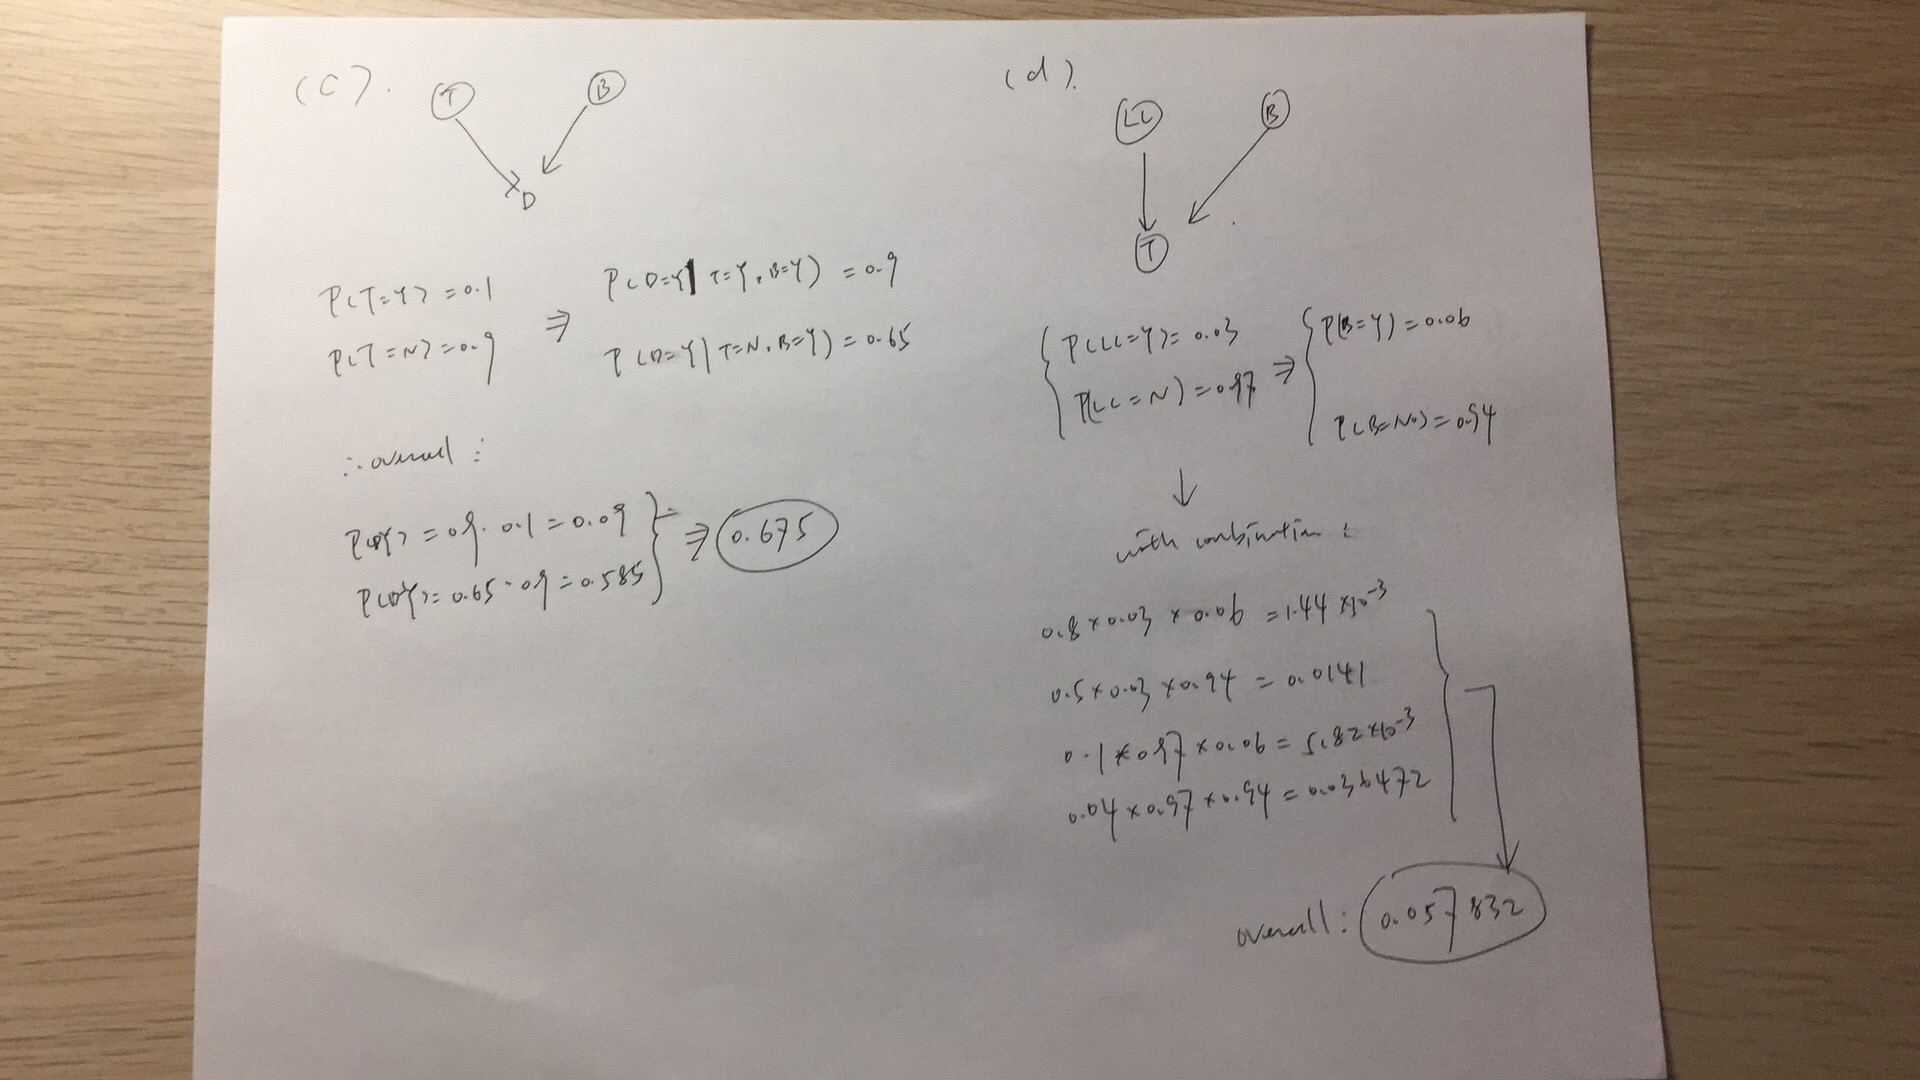

In [6]:
Image(filename='img/2.jpeg')

# Question 3: (15 pts)

In this problem we will be classifying data in the CIFAR-10 dataset which contains 60000 images classified in 10 mutually exclusive classes. Please download and extract the data from https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

For parts 1-3 we will build a classifier to determine whether an image is in class 0 or class 1. In part 4, we will classify the imges into any of 10 classes. We've included starter code to load the data from the unzipped folder.

1. Train a logistic regression with almost no regularization (pass l2 (ridge) to penalty and 1,000,000 to the C parameter which is the inverse of regularization strength lambda. This essentially does l2 regularization but applies very little weight to the penalty term) and report the [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) on the test data. Also report the accuracy for the "y = 0" class, the "y = 1" class, and the average per-class accuracy on the test data. Average per-class accuracy is described in this [post](http://rasbt.github.io/mlxtend/user_guide/evaluate/scoring/). You can use your confusion matrix to calculate this.  (4pts)
2. Repeat step 1 except use l2 penalty with Cs of [0.01, 0.1, 1, 10 ,100]. You will want to use 3-fold cross validation to select the best parameter. To evaluate which parameter is best, maximize the average per-class accuracy. To help with this task, check out [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) and how to make your own [custom scorer](http://scikit-learn.org/stable/modules/model_evaluation.html).  (4pts)
3. Repeat question 2 except use l1 instead of l2 as the penalty type, use Cs of  [0.01, ..., 100].  Compare the performances of the models (no regularization, l2, l1) using the average per-class accuracy.  (3pts)
4. Using the optimal regularization parameter obtained in step 2, train a logistic regression classifier with ridge penalty to clasify $\textbf{all 10 digits}$ (digits 0,1,2,3,...9) of the MNIST dataset.  Use 'newton-cg' and 'multinomial' options for solver and multi_class parameters, respectively. Report the average per-class accuracy and confusion matrix (10 X 10) on the test data. (4pts)

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import _pickle as cPickle
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

def unpickle(path):
    with open(path, 'rb') as fo:
      data = cPickle.load(fo, encoding='latin1')
    return data

def load_data(path, test=False):
    data = []
    labels = []
    if test:
        batch = unpickle(path + '/test_batch')
        data = batch['data']
        labels = batch['labels']
    else:
        for batch_num in range(1, 5):
            batch = unpickle(path + '/data_batch_' + str(batch_num))
            if len(data) == 0: 
                data = batch['data']
            else:
                data = np.concatenate([data, batch['data']], axis=0)
            labels += batch['labels']
    data = np.array(data)
    labels = np.array(labels)
    return data, labels

In [2]:
all_train_data, all_train_labels = load_data('./cifar-10-batches-py')
all_test_data, all_test_labels = load_data('./cifar-10-batches-py', test=True)

two_class_train_data = all_train_data[(all_train_labels == 0) | (all_train_labels == 1)]
two_class_train_labels = all_train_labels[(all_train_labels == 0) | (all_train_labels == 1)]

two_class_test_data = all_test_data[(all_test_labels == 0) | (all_test_labels == 1)]
two_class_test_labels = all_test_labels[(all_test_labels == 0) | (all_test_labels == 1)]

X_train = (two_class_train_data / 255.)
y_train = two_class_train_labels

X_test = (two_class_test_data / 255.)
y_test = two_class_test_labels

In [3]:
y_test.shape

(2000,)

In [4]:
X_train = X_train[np.array(range(0, 7972, 10))]
y_train = y_train[np.array(range(0, 7972, 10))]

X_test = X_test[np.array(range(0, 2000, 10))]
y_test = y_test[np.array(range(0, 2000, 10))]

# Answer

In [28]:
lr = LogisticRegression(penalty='l2', C=1000000)
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

# confustion matrix
print("confusion matrix is: ")
print(confusion_matrix(y_test, y_predict))

# calculate the accuracy for class 1
number_of_correct = 0
number_of_class = 0
for i in range(len(y_test)):
    if y_test[i] == 1:
        number_of_class = number_of_class + 1
        if y_test[i] == y_predict[i]:
            number_of_correct = number_of_correct + 1
            
print("accuracy for class 1 is: " + str(number_of_correct / number_of_class))
            
# calculate the accuracy for class 0
number_of_correct = 0
number_of_class = 0
for i in range(len(y_test)):
    if y_test[i] == 0:
        number_of_class = number_of_class + 1
        if y_test[i] == y_predict[i]:
            number_of_correct = number_of_correct + 1
        
print("accuracy for class 0 is: " + str(number_of_correct / number_of_class))

# average per class accuracy
n = len(y_test)
ACC = (78 + 75) / n
print("accuracy is: " + str(ACC))
APC_ACC = (78 + 75)/ 200 * 2 / 2
print("average per-class accuracy is: " + str(APC_ACC))

confusion matrix is: 
[[78 17]
 [30 75]]
accuracy for class 1 is: 0.7142857142857143
accuracy for class 0 is: 0.8210526315789474
accuracy is: 0.765
average per-class accuracy is: 0.765


## Question 3 (1) Responses
confusion matrix is: 
[[78 17]
 [30 75]]   
accuracy for class 1 is: 0.7142857142857143   
accuracy for class 0 is: 0.8210526315789474   
accuracy is: 0.765, average per-class accuracy is: 0.765, because it is the binary case, so overall accuracy is same as average per-class accuracy.

In [29]:
from sklearn.metrics import make_scorer
'''
Repeat step 1 except use l2 penalty with Cs of [0.01, 0.1, 1, 10 ,100]. 
You will want to use 3-fold cross validation to select the best parameter. 
To evaluate which parameter is best, maximize the average per-class accuracy. 
To help with this task, check out GridSearchCV and how to make your own custom scorer. (4pts)
'''
# make custom scorer
accuracy_scorer = make_scorer(accuracy_score)

# make model with cv = 3
parameters = {'C':[0.01, 0.1, 1, 10, 100]}
lr = LogisticRegression(penalty='l2')
clf = GridSearchCV(lr, cv=3, param_grid=parameters, scoring=accuracy_scorer)
clf.fit(X_train, y_train)
print("best parameter of C is: " + str(clf.best_params_))

best parameter of C is: {'C': 0.01}


In [30]:
# repeat the question 1
lr = LogisticRegression(penalty='l2', C=0.01)
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

# confustion matrix
print("confusion matrix is: ")
print(confusion_matrix(y_test, y_predict))

# calculate the accuracy for class 1
number_of_correct = 0
number_of_class = 0
for i in range(len(y_test)):
    if y_test[i] == 1:
        number_of_class = number_of_class + 1
        if y_test[i] == y_predict[i]:
            number_of_correct = number_of_correct + 1
            
print("accuracy for class 1 is: " + str(number_of_correct / number_of_class))
            
# calculate the accuracy for class 0
number_of_correct = 0
number_of_class = 0
for i in range(len(y_test)):
    if y_test[i] == 0:
        number_of_class = number_of_class + 1
        if y_test[i] == y_predict[i]:
            number_of_correct = number_of_correct + 1
        
print("accuracy for class 0 is: " + str(number_of_correct / number_of_class))

# average per class accuracy
n = len(y_test)
ACC = (78 + 78) / n
print("accuracy is: " + str(ACC))
APC_ACC = (78 + 78)/ 200 * 2 / 2
print("average per-class accuracy is: " + str(APC_ACC))

confusion matrix is: 
[[78 17]
 [27 78]]
accuracy for class 1 is: 0.7428571428571429
accuracy for class 0 is: 0.8210526315789474
accuracy is: 0.78
average per-class accuracy is: 0.78


## Question 3 (2) Responses
best parameter of C is: {'C': 0.01}   
confusion matrix is: 
[[78 17]
 [27 78]]   
accuracy for class 1 is: 0.7428571428571429   
accuracy for class 0 is: 0.8210526315789474   
accuracy is: 0.78   
average per-class accuracy is: 0.78   

In [31]:
'''
Repeat question 2 except use l1 instead of l2 as the penalty type, 
use Cs of [0.01, ..., 100]. Compare the performances of the models (no regularization, l2, l1) 
using the average per-class accuracy.
'''

# make custom scorer
accuracy_scorer = make_scorer(accuracy_score)

# make model with cv = 3
parameters = {'C':[0.01, 0.1, 1, 10, 100]}
lr = LogisticRegression(penalty='l1')
clf = GridSearchCV(lr, cv=3, param_grid=parameters, scoring=accuracy_scorer, n_jobs=-1)
clf.fit(X_train, y_train)
print("best parameter of C is: " + str(clf.best_params_))

best parameter of C is: {'C': 1}


In [46]:
# repeat question 3 (2)
lr = LogisticRegression(penalty='l1', C=1)
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)



# LR_l1_BestC = LogisticRegression(penalty='l1', C=1)
# LR_l1_BestC.fit(X_train, y_train)

# y_LR_l1_predict = LR_l1_BestC.predict(X_test)
# con_LR_l1_matrix = confusion_matrix(y_test, y_LR_l1_predict)
# con_LR_l1_matrix


# confustion matrix
print("confusion matrix is: ")
print(confusion_matrix(y_test, y_predict))

# calculate the accuracy for class 1
number_of_correct = 0
number_of_class = 0
for i in range(len(y_test)):
    if y_test[i] == 1:
        number_of_class = number_of_class + 1
        if y_test[i] == y_predict[i]:
            number_of_correct = number_of_correct + 1
            
print("accuracy for class 1 is: " + str(number_of_correct / number_of_class))
            
# calculate the accuracy for class 0
number_of_correct = 0
number_of_class = 0
for i in range(len(y_test)):
    if y_test[i] == 0:
        number_of_class = number_of_class + 1
        if y_test[i] == y_predict[i]:
            number_of_correct = number_of_correct + 1
        
print("accuracy for class 0 is: " + str(number_of_correct / number_of_class))

# average per class accuracy
n = len(y_test)
ACC = (75 + 82) / n
print("accuracy is: " + str(ACC))
APC_ACC = (75 + 82)/ 200 * 2 / 2
print("average per-class accuracy is: " + str(APC_ACC))

confusion matrix is: 
[[75 20]
 [23 82]]
accuracy for class 1 is: 0.780952380952381
accuracy for class 0 is: 0.7894736842105263
accuracy is: 0.785
average per-class accuracy is: 0.785


## Question 3 (3) Responses
best parameter of C using l2 as pelnaty is: {'C': 1}
confusion matrix is: 
[[75 20]
 [23 82]]   
accuracy for class 1 is: 0.780952380952381   
accuracy for class 0 is: 0.7894736842105263   
accuracy is: 0.785   
average per-class accuracy is: 0.785   

### Compare with 3 Models by Average per Class Accuracy
1. No Regularization -> 0.765
2. l2 as penalty -> 0.78
3. l1 as penalty -> 0.785

We can see that l2 and l1 with almost the same performance in average per-class accuracy. The model with no regularization has the worst performance. Because, the ridge and lasso regularization term can prevent the over-fit in the model. And by using cross validation on test data and grid search for parameter C, we naturally get the "best" result on lasso and ridge.

In [49]:
'''
Using the optimal regularization parameter obtained in step 2, 
train a logistic regression classifier with ridge penalty to 
clasify  all 10 digitsall 10 digits  (digits 0,1,2,3,...9) of the MNIST dataset. 
Use 'newton-cg' and 'multinomial' options for solver and multi_class parameters, respectively. 
Report the average per-class accuracy and confusion matrix (10 X 10) on the test data. (4pts)
'''
# preprocess the data
X_train = (all_train_data / 255.)
y_train = all_train_labels

X_test = (all_test_data / 255.)
y_test = all_test_labels

# construct the model
lr = LogisticRegression(penalty='l2', C=0.01, solver='newton-cg', multi_class='multinomial', n_jobs=-1)
lr.fit(X_train, y_train)

y_predict = lr.predict(X_test)
matrix = confusion_matrix(y_test, y_predict)
print("confusion matrix for 10 digits is: ")
print(matrix)

confusion matrix for 10 digits is: 
[[489  43  56  38  21  32  22  47 177  75]
 [ 55 498  33  35  21  35  41  50  73 159]
 [ 98  44 286  85 118  86 152  67  43  21]
 [ 40  58 102 263  62 187 136  49  39  64]
 [ 55  30 134  71 297  81 165 113  27  27]
 [ 39  48  93 172  74 344  89  70  50  21]
 [ 14  38  78 125  90  77 497  37  14  30]
 [ 42  50  65  63  84  78  48 460  35  75]
 [157  70  23  23   8  51   8  19 537 104]
 [ 74 187  18  29  17  28  43  51  87 466]]


In [59]:
# calculate the average per class accuracy

# calculate the sum
global_sum = 0

for i in range(10):
    for j in range(10):
        global_sum = global_sum + matrix[i][j]

# calculate the APC ACC
final_average = 0
for i in range(10):
    sum = global_sum
    for j in range(10):  # vertical
        if (j != i):
            sum = sum - matrix[j][i]  # vertical 
            sum = sum - matrix[i][j]  # horizontal
    final_average = final_average + (sum / global_sum)
    
# print the APC ACC
APC_ACC = final_average / 10
print("The average per-class accuracy is: " + str(APC_ACC))

The average per-class accuracy is: 0.8827399999999999


## Question 3 (4) Responses
confusion matrix for 10 digits is:    
[[489  43  56  38  21  32  22  47 177  75]   
 [ 55 498  33  35  21  35  41  50  73 159]   
 [ 98  44 286  85 118  86 152  67  43  21]   
 [ 40  58 102 263  62 187 136  49  39  64]   
 [ 55  30 134  71 297  81 165 113  27  27]   
 [ 39  48  93 172  74 344  89  70  50  21]   
 [ 14  38  78 125  90  77 497  37  14  30]   
 [ 42  50  65  63  84  78  48 460  35  75]   
 [157  70  23  23   8  51   8  19 537 104]   
 [ 74 187  18  29  17  28  43  51  87 466]]  
 
The average per-class accuracy is: 0.8827399999999999

# Question 4: (10 pts)
In this problem, we will perform some very basic image recovery using linear regression. The main purpose of this example is to set up the Azure cloud and get acquainted with the environment. Download the dataset on the remote machine into the same folder as this notebook.

This part of the homework must be run on the azure cloud machine. We will doublecheck that everyone has used at least a portion of their allocated resources to ensure that everyone has successfully set up the VM.

### Using Linear Regression for Image Recovery
Given a set of uncorrupted images, $X$, and a single corrupted image $y$, we can find a linear combination of the images in the dataset which best reproduce the corrupted image. This sounds like a regression problem! 

Obviously, if we perfectly reproduce the corrupted image, then we haven't done a good job recovering the original image. However, if we introduce a penalty on the number of images used in the solution, then we can reproduce a decent approximation of the original image.

After finding a linear combination of the images $\beta$, $X\beta$ will give us our recovered image (this is done for you in the `recover` function below). Once again, for the result to be an acceptable recovery of the image $X\beta$ should not exactly equal $y$ since $y$ is the corrupted image.

Each image is flattened into a vector of lengh 4096 (each image is 64x64) and the columns of $X$ correspond to the uncorrupted images in the dataset. You can think of the uncorrupted images in the dataset as the features.

The starter code we have provided below does most of the work for us, all that is left to do is to:
1. Modify the `ols` and `ridge` functions to solve OLS and ridge, respectively on the arguments provided to the functions ($X$ and $y$). (6pts)
2. Try different values of the regularization coefficient for the ridge problem. You should be able to get a decent reproduction of the original image. (2pts)
3. Explain why OLS does a bad job recovering the image, but ridge does an acceptable job with a good choice of alpha (2pts)

In [1]:
from scipy.io import loadmat

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

from matplotlib.pyplot import imshow

import numpy as np
import numpy.linalg as la

import PIL.Image
import glob
import re

def read_image_array(image_path):
  im = np.asarray(PIL.Image.open(image_path)).ravel()
  return im

def read_images(ignore=[]):
  frame_path = 'faces/'
  frames = []
  file_list = glob.glob(frame_path + "*.png")
  for file_name in set(file_list) - set(ignore):
    frames.append(read_image_array(file_name))
  frames_array = np.array(frames).T
  normalized = frames_array / 255.0 - np.mean(frames_array / 255.0, axis=0)
  return normalized

def ols(X, y):
  ols = LinearRegression()
  ols.fit(X, y)
  model = ols.coef_
  return model

def ridge(X, y):
  #UPDATE THIS FUNCTION
  ridge = Ridge()
  ridge.fit(X, y)
  model = ridge.coef_
  return model

def get_reference_image_name(corrupted_image_name):
  parts = corrupted_image_name.split("_")
  return parts[1]

def recover(method, name):
  print("Recovering with", name)
  plt.figure()
  corrupted_image_name = "cor_585.png"
  print("recovering", corrupted_image_name)
  corrupted_image_path = corrupted_image_name
  original_image_dimensions = np.asarray(PIL.Image.open(corrupted_image_path)).shape
  reference_image_name = get_reference_image_name(corrupted_image_name)
  reference_image = read_image_array('faces/' + reference_image_name)
  reference_image_normalized = reference_image / 255.0 - np.mean(reference_image / 255.0)
  corrupted_image = read_image_array(corrupted_image_path)
  corrupted_image_normalized = corrupted_image / 255.0 - np.mean(corrupted_image / 255.0)
  image_database = read_images()
  model = method(image_database, corrupted_image_normalized)
  recovered_image = np.dot(image_database, model)
  recovered_image_restored = (np.dot(image_database, model) + np.mean(corrupted_image / 255.0)) * 255
  return imshow(PIL.Image.fromarray(np.int32(recovered_image_restored.reshape(original_image_dimensions))).convert("L"), cmap='gray')

The code below will then save the restored images to the filesystem.

Recovering with OLS
recovering cor_585.png


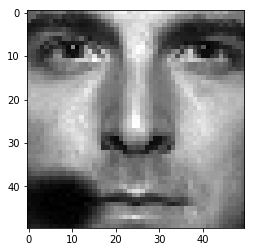

In [2]:
%matplotlib inline
recover(ols, 'OLS')

Recovering with Ridge
recovering cor_585.png


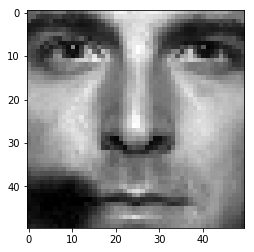

In [3]:
recover(ridge, 'Ridge')

Recovering with Ridge
recovering cor_585.png
Recovering with Ridge
recovering cor_585.png
Recovering with Ridge
recovering cor_585.png
Recovering with Ridge
recovering cor_585.png
Recovering with Ridge
recovering cor_585.png
Recovering with Ridge
recovering cor_585.png
Recovering with Ridge
recovering cor_585.png
Recovering with Ridge
recovering cor_585.png
Recovering with Ridge
recovering cor_585.png
Recovering with Ridge
recovering cor_585.png


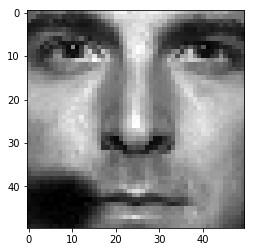

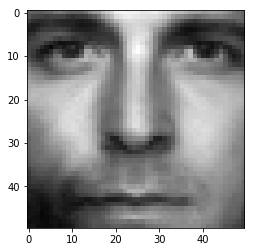

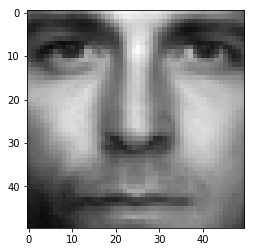

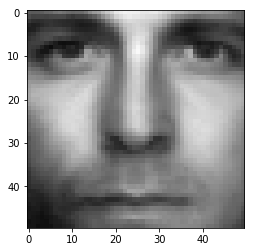

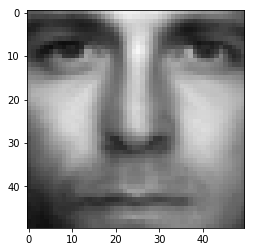

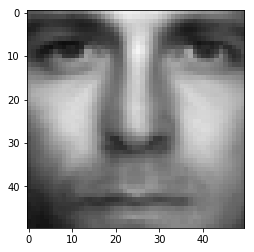

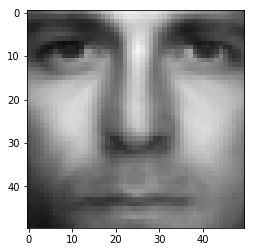

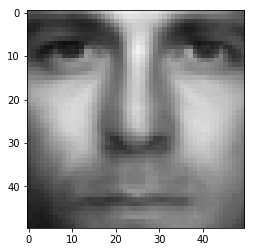

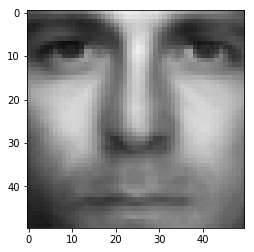

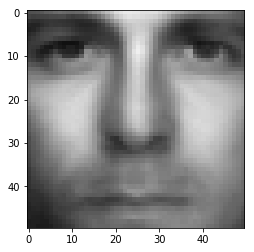

In [6]:
def ridge(X, y, alpha):
  #UPDATE THIS FUNCTION
  ridge = Ridge(alpha=alpha, solver='auto')
  ridge.fit(X, y)
  model = ridge.coef_
  return model

def recover(method, name, alpha):
  print("Recovering with", name)
  plt.figure()
  corrupted_image_name = "cor_585.png"
  print("recovering", corrupted_image_name)
  corrupted_image_path = corrupted_image_name
  original_image_dimensions = np.asarray(PIL.Image.open(corrupted_image_path)).shape
  reference_image_name = get_reference_image_name(corrupted_image_name)
  reference_image = read_image_array('faces/' + reference_image_name)
  reference_image_normalized = reference_image / 255.0 - np.mean(reference_image / 255.0)
  corrupted_image = read_image_array(corrupted_image_path)
  corrupted_image_normalized = corrupted_image / 255.0 - np.mean(corrupted_image / 255.0)
  image_database = read_images()
  model = method(image_database, corrupted_image_normalized, alpha)
  recovered_image = np.dot(image_database, model)
  recovered_image_restored = (np.dot(image_database, model) + np.mean(corrupted_image / 255.0)) * 255
  return imshow(PIL.Image.fromarray(np.int32(recovered_image_restored.reshape(original_image_dimensions))).convert("L"), cmap='gray')

%matplotlib inline
alphas = np.linspace(0.1, 1000, 10)

for alpha in alphas:
    recover(ridge, 'Ridge', alpha)

## Question 4 Responses
1. Please see above.
2. We try 10 different alpha from 0.1 to 1000, you can see the result getting better but quality is the tradeoff. And when alpha is around 200-300, the recovering image is reasonally acceptable.
3. Reason for better performance in Ridge Regression
    1. One reason I guess is that, because the human face image is symmetrical, and the data point in the matrix or we say features in the input data point are high co-related. This kind of ill-conditioned (covariates correlated) will cause estimators being sensitive to noise when using ols. But ridge regression are used to dampen the effects of the sensitivity to noise.
    2. Another reason I think the ridge will shrink the coefficient towards 0, that avoids the overfitting in the model. In the ols, the model tends to minimize the error but conversely leave the missing part over-fit.

# Question 5: (5 pts)
What are two properties of Naïve Bayes that make it so suitable for parallel/distributed computation and for analyzing "streaming" data (e.g. each document is processed only once and need not be further stored or revisited)? (5 pts)

# Answer

## Question 5 Response:
1. The most important property, which is also the basic assumption for naive bayes is that the value of a particular feature is independent of the value of any other feature, given the class variable. This important assumption lessens dependance on its assumptions but also retains its inherent simplicity and clear probabilistic semantics. The presence of a particular feature of a class is unrelated to to the presence of any other features on a given the class variable, this property is right for processing the large stream data, because it is very hard for retrieving the streaming data efficiently and compute them quickly without compromising the memory and cpu. But using naive bayes, to be specific, by using parallel naive bayes's mapReduce model, it is fast and easy to implement and the conditional probabilities of the features in a class are learned in the training step.
2. The bayes is good not only when features are independent, but also when dependencies of features from each other are similar between features, which can be applied in parallel/distributed computation process with high-dimensional feature space and sparse data resulting in reducing the number of parameters (and data sparseness).
3. Another unique characteristics of naive bayes are, they are robust to isolate noise points since such points are averaged out when approximating conditional probabilities of data. It also handles missing values just by ignoring the examples during classifier building. This property also helps on streaming data analysis, in which, the information missing can happen randomly. By using naive bayes model, the noise and False Acceptance Rate can be optimized.